Loading 41 files.
Loading 41 files.


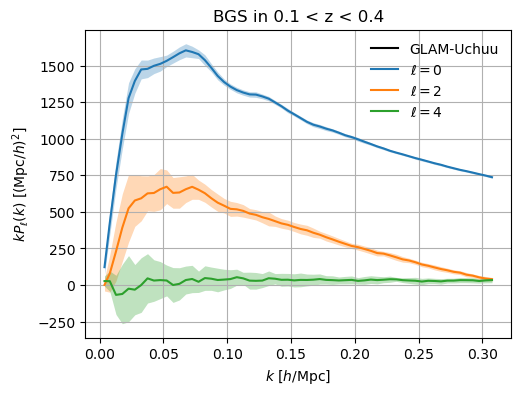

Loading 41 files.
Loading 41 files.


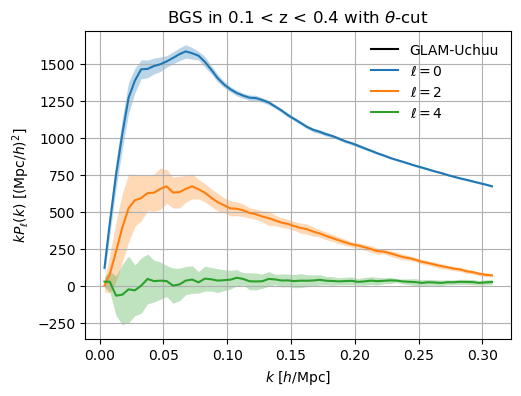

Loading 41 files.
Loading 41 files.
Loading 25 files.


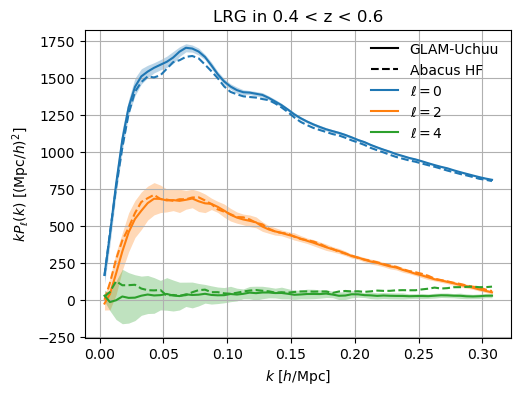

Loading 41 files.
Loading 41 files.
Loading 25 files.


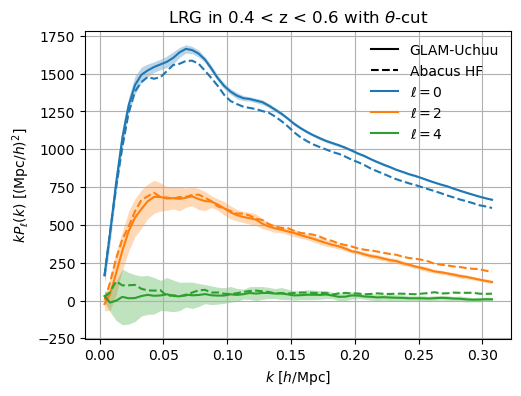

Loading 41 files.
Loading 41 files.
Loading 25 files.


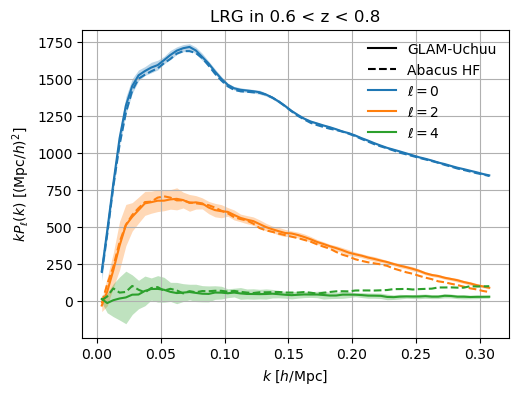

Loading 41 files.
Loading 41 files.
Loading 25 files.


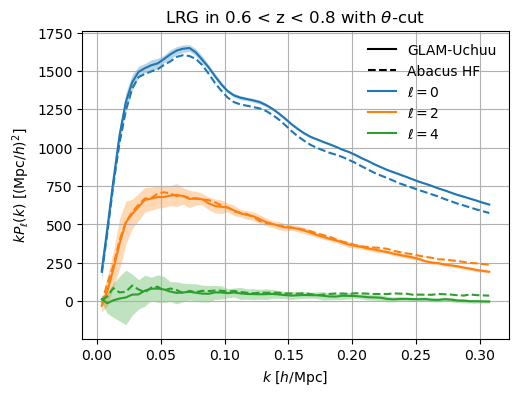

Loading 42 files.
Loading 42 files.
Loading 25 files.


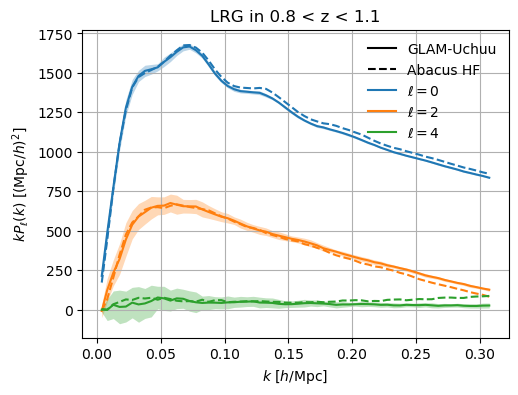

Loading 42 files.
Loading 42 files.
Loading 25 files.


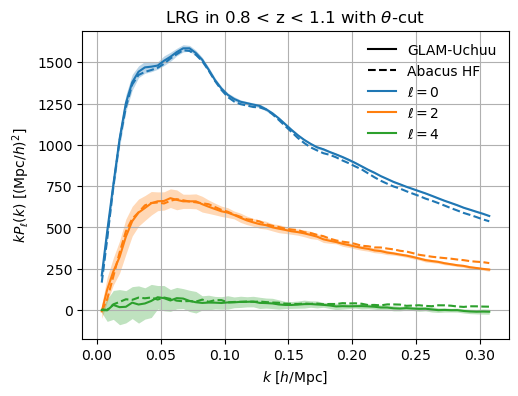

In [1]:
from pathlib import Path
from functools import partial

from matplotlib import pyplot as plt
import numpy as np

from jaxpower import Spectrum2Poles

from uchuu import get_measurement_fn
from abacus_hf import get_measurement_fn as get_abacus_measurement_fn

plot_dir = Path('_plots')
plot_dir.mkdir(exist_ok=True)

rebin = 5
for tracer in ['BGS', 'LRG1', 'LRG2', 'LRG3'][:0]:
    for kind in ['mesh2spectrum', 'mesh2spectrum_thetacut']:
        catalog_args = dict(tracer=tracer)
        with_abacus = 'LRG' in tracer
        zsnap, zrange = {'BGS': (None, (0.1, 0.4)), 'LRG1': (0.5, (0.4, 0.6)), 'LRG2': (0.725, (0.6, 0.8)), 'LRG3': (0.950, (0.8, 1.1))}[tracer]
        if with_abacus:
            catalog_abacus_args = dict(tracer=tracer[:3], zsnap=zsnap, zrange=zrange)

        def load(get_fn):
            fns = [[get_fn(imock=imock, region=region, kind=kind) for region in ['NGC', 'SGC']] for imock in range(50)]
            toret = [Spectrum2Poles.load(fn[0]) + Spectrum2Poles.load(fn[1]) for fn in fns if Path(fn[0]).exists()]
            print(f'Loading {len(toret):d} files.')
            return toret

        pk_uchuu = Spectrum2Poles.mean(load(partial(get_measurement_fn, **catalog_args))).slice(slice(0, None, rebin))
        cov_uchuu = Spectrum2Poles.cov(load(partial(get_measurement_fn, **catalog_args))).slice(slice(0, None, rebin))
        if with_abacus:
            pk_abacus = Spectrum2Poles.mean(load(partial(get_abacus_measurement_fn, **catalog_abacus_args))).slice(slice(0, None, rebin))
        
        fig, ax = plt.subplots(figsize=(5.5, 4))
        title = f'{tracer[:3]} in {zrange[0]:.1f} < z < {zrange[1]:.1f}'
        if 'thetacut' in kind: title += rf' with $\theta$-cut'
        ax.set_title(title)
        ax.plot([], [], color='k', linestyle='-', label='GLAM-Uchuu')
        if with_abacus:
            ax.plot([], [], color='k', linestyle='--', label='Abacus HF')
        for ill, ell in enumerate(pk_uchuu.projs):
            color = 'C{:d}'.format(ill)
            k = pk_uchuu.x(projs=ell)
            ax.plot(k, k * pk_uchuu.view(projs=ell).real, color=color, linestyle='-', label=f'$\ell = {ell:d}$')
            std = cov_uchuu.select(projs=ell, select_projs=True).std()
            ax.fill_between(k, k * (pk_uchuu.view(projs=ell).real - std),
                            k * (pk_uchuu.view(projs=ell).real + std),
                            color=color, alpha=0.3, linewidth=0.)
            if with_abacus:
                ax.plot(k, k * pk_abacus.view(projs=ell).real, color=color, linestyle='--')

        ax.set_xlabel(r'$k$ [$h/\mathrm{Mpc}$]')
        ax.set_ylabel(r'$k P_{\ell}(k)$ [$(\mathrm{Mpc}/h)^{2}$]')
        ax.legend(frameon=False)
        ax.grid(True)
        basename = f'spectrum_GLAM-Uchuu_{tracer}'
        if 'thetacut' in kind: basename += '_thetacut'
        fig.savefig(plot_dir / (basename + '.png'), bbox_inches='tight', pad_inches=0.1, dpi=200)
        plt.show()

Loading 4 files.
Loading 4 files.
Loading 5 files.


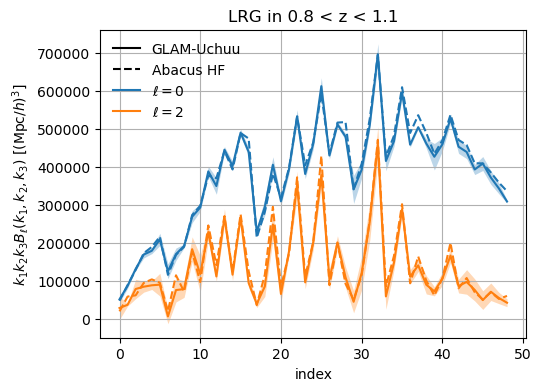

In [10]:
from jaxpower import Spectrum3Poles

plot_dir = Path('_plots')
plot_dir.mkdir(exist_ok=True)

rebin = 5
for tracer in ['BGS', 'LRG1', 'LRG2', 'LRG3'][-1:]:
    for kind in ['mesh3spectrum_scoccimarro']:
        catalog_args = dict(tracer=tracer)
        with_abacus = 'LRG' in tracer
        zsnap, zrange = {'BGS': (None, (0.1, 0.4)), 'LRG1': (0.5, (0.4, 0.6)), 'LRG2': (0.725, (0.6, 0.8)), 'LRG3': (0.950, (0.8, 1.1))}[tracer]
        if with_abacus:
            catalog_abacus_args = dict(tracer=tracer[:3], zsnap=zsnap, zrange=zrange)

        def load(get_fn):
            #fns = [[get_fn(imock=imock, region=region, kind=kind) for region in ['NGC', 'SGC']] for imock in range(50)]
            #toret = [Spectrum3Poles.load(fn[0]) + Spectrum3Poles.load(fn[1]) for fn in fns if Path(fn[0]).exists()]
            fns = [get_fn(imock=imock, region='NGC', kind=kind) for imock in range(5)]
            toret = [Spectrum3Poles.load(fn) for fn in fns if Path(fn).exists()]
            print(f'Loading {len(toret):d} files.')
            return toret

        pk_uchuu = Spectrum3Poles.mean(load(partial(get_measurement_fn, **catalog_args)))
        cov_uchuu = Spectrum3Poles.cov(load(partial(get_measurement_fn, **catalog_args)))
        if with_abacus:
            pk_abacus = Spectrum3Poles.mean(load(partial(get_abacus_measurement_fn, **catalog_abacus_args)))
        
        fig, ax = plt.subplots(figsize=(5.5, 4))
        title = f'{tracer[:3]} in {zrange[0]:.1f} < z < {zrange[1]:.1f}'
        if 'thetacut' in kind: title += rf' with $\theta$-cut'
        ax.set_title(title)
        ax.plot([], [], color='k', linestyle='-', label='GLAM-Uchuu')
        if with_abacus:
            ax.plot([], [], color='k', linestyle='--', label='Abacus HF')
        for ill, ell in enumerate(pk_uchuu.projs):
            color = 'C{:d}'.format(ill)
            x = np.prod(pk_uchuu.xavg(projs=ell, method='mid'), axis=-1)
            ax.plot(x[1:] * pk_uchuu.view(projs=ell).real[1:], color=color, linestyle='-', label=f'$\ell = {ell:d}$')
            std = cov_uchuu.select(projs=ell, select_projs=True).std()
            ax.fill_between(np.arange(len(x) - 1), x[1:] * (pk_uchuu.view(projs=ell).real[1:] - std[1:]),
                            x[1:] * (pk_uchuu.view(projs=ell).real[1:] + std[1:]),
                            color=color, alpha=0.3, linewidth=0.)
            if with_abacus:
                x = np.prod(pk_abacus.xavg(projs=ell, method='mid'), axis=-1)
                ax.plot(x[1:] * pk_abacus.view(projs=ell).real[1:], color=color, linestyle='--')

        ax.set_xlabel(r'index')
        ax.set_ylabel(r'$k_1 k_2 k_3 B_{\ell}(k_1, k_2, k_3)$ [$(\mathrm{Mpc}/h)^{3}$]')
        ax.legend(frameon=False)
        ax.grid(True)
        basename = f'bispectrum_GLAM-Uchuu_{tracer}'
        if 'thetacut' in kind: basename += '_thetacut'
        fig.savefig(plot_dir / (basename + '.png'), bbox_inches='tight', pad_inches=0.1, dpi=200)
        plt.show()